In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
glass_data = pd.read_csv('glass.csv')




In [23]:
# Display the first few rows of the dataframe
print(glass_data.head())



        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1


In [24]:
# Summary statistics
print(glass_data.describe())



               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1

In [25]:
# Check for any missing values
print(glass_data.isnull().sum())

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [26]:
# Separate features (X) and target variable (y)
X = glass_data.drop(columns=['Type'])
y = glass_data['Type']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (optional for KNN, but can improve performance)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [27]:
X_train_scaled.shape

(171, 9)

In [28]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn_classifier.fit(X_train_scaled, y_train)


KNeighborsClassifier()

In [29]:
# Evaluate the model on the testing data
accuracy = knn_classifier.score(X_test_scaled, y_test)
print("Accuracy of the KNN classifier:", accuracy)


Accuracy of the KNN classifier: 0.6976744186046512


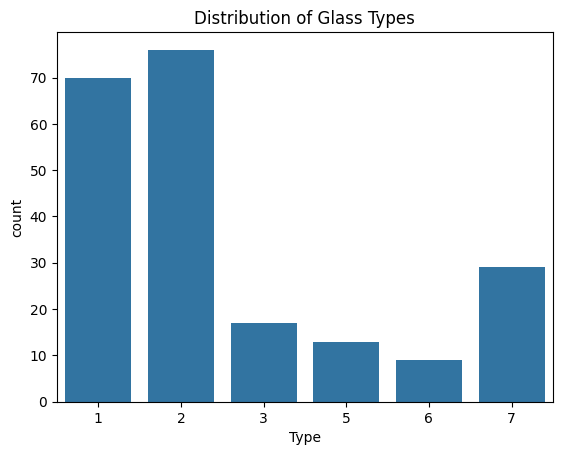

In [30]:
# Check the distribution of the target variable 'Type'
sns.countplot(x='Type', data=glass_data)
plt.title('Distribution of Glass Types')
plt.show()

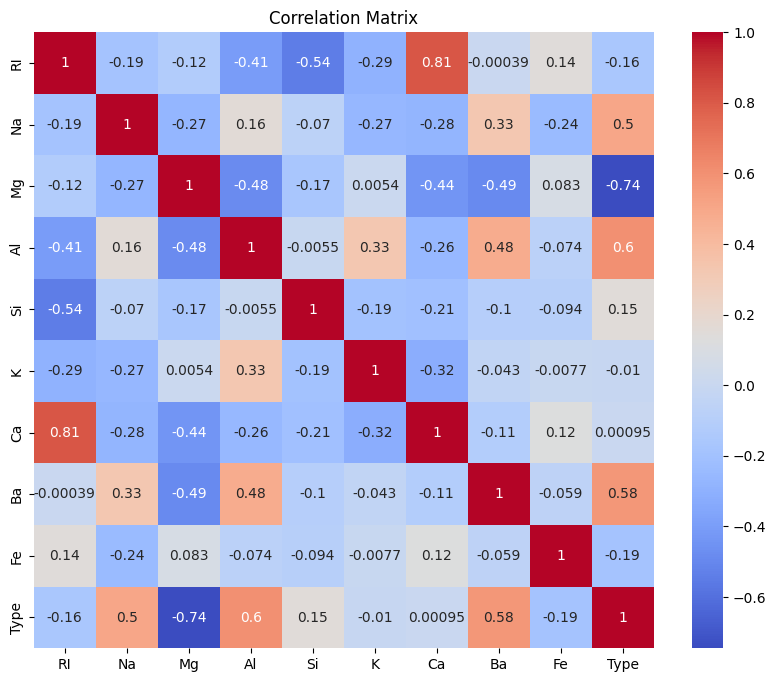

In [31]:
# Check for correlations between features
corr = glass_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [32]:
# Experiment with different values of k
k_values = [3, 5, 7, 9, 11]  # Define a list of values for k

# Initialize an empty list to store the accuracies for different k values
accuracies = []

# Iterate over each value of k and train a KNN model
for k in k_values:
    # Initialize the KNN classifier with the current value of k
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Train the classifier
    knn_classifier.fit(X_train_scaled, y_train)

    # Evaluate the model on the testing data and store the accuracy
    accuracy = knn_classifier.score(X_test_scaled, y_test)
    accuracies.append(accuracy)

    print("Accuracy of KNN classifier with k =", k, ":", accuracy)




Accuracy of KNN classifier with k = 3 : 0.813953488372093
Accuracy of KNN classifier with k = 5 : 0.6976744186046512
Accuracy of KNN classifier with k = 7 : 0.7209302325581395
Accuracy of KNN classifier with k = 9 : 0.6744186046511628
Accuracy of KNN classifier with k = 11 : 0.627906976744186


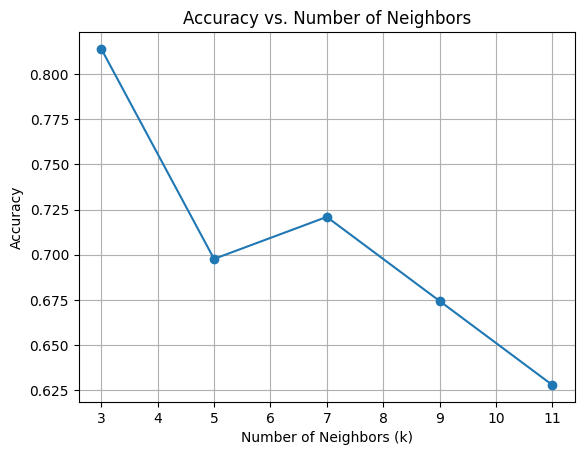

In [33]:
# Plot the accuracies for different values of k
import matplotlib.pyplot as plt

plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors')
plt.grid(True)
plt.show()